# **Drone Detection using YOLOV8 Object Detection**

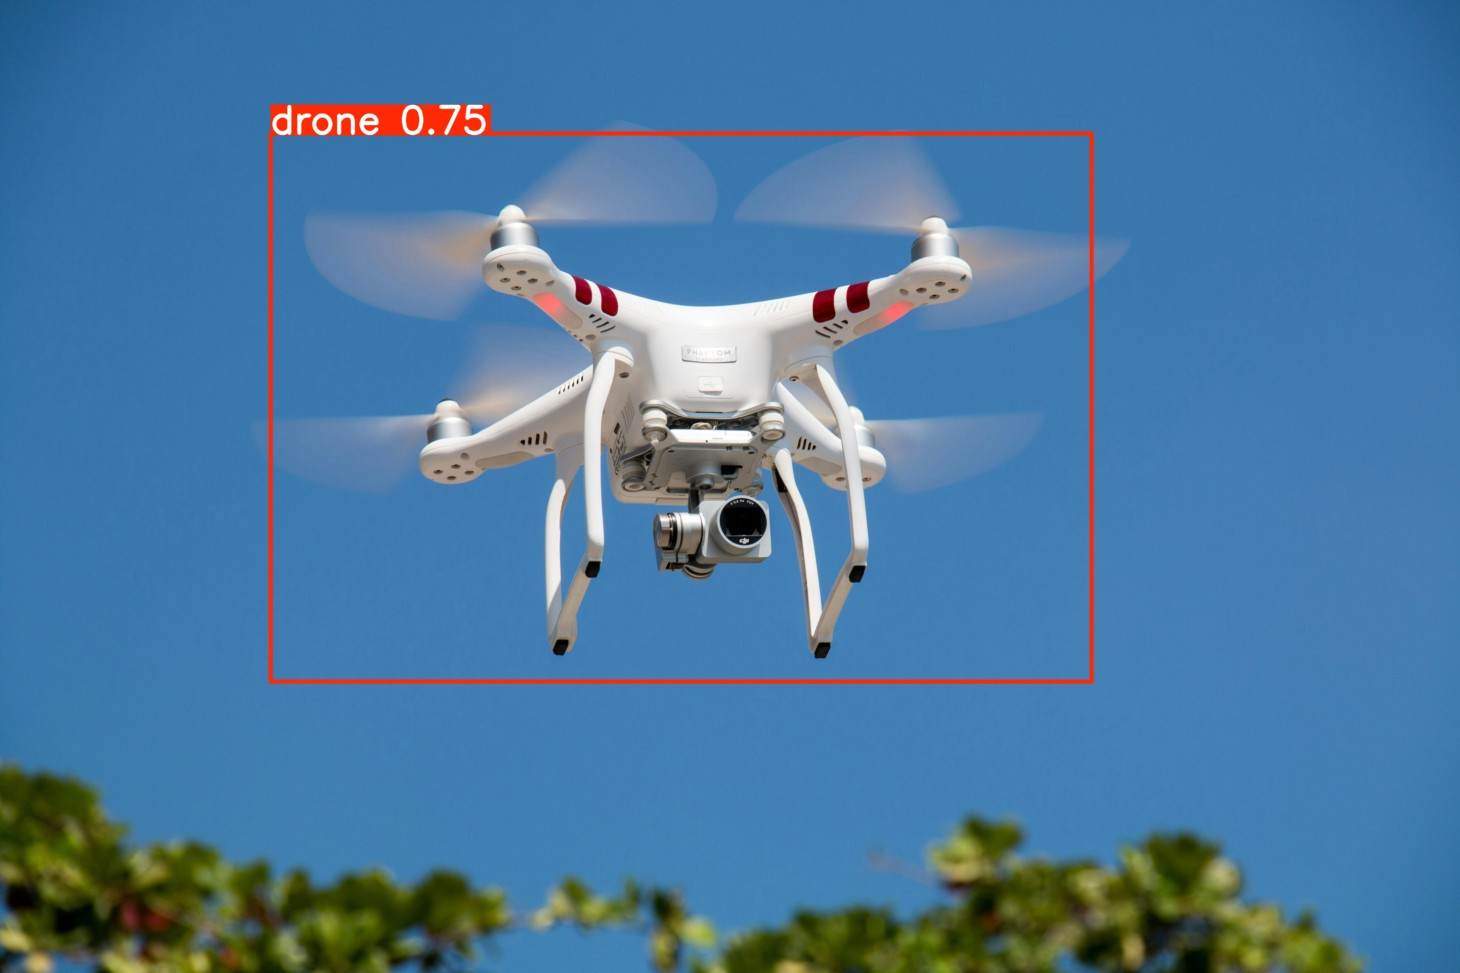

## **Needs of Drone Detection**

Drone detection is becoming increasingly vital in a variety of sectors due to the rapid proliferation of drone technology. With applications ranging from commercial delivery services to aerial photography, drones are now a common sight in our skies. However, this widespread usage also introduces significant challenges, particularly in the realms of security, privacy, and airspace management. Drone detection systems are essential for identifying unauthorized or potentially dangerous drones in restricted areas, such as airports, military zones, or public events. These systems enable timely interventions, ensuring safety and preventing potential threats. Additionally, drone detection is crucial in safeguarding critical infrastructure, protecting wildlife in conservation areas, and maintaining privacy in sensitive locations. As drones continue to evolve in capability and accessibility, the need for effective detection systems will only grow, making them an indispensable tool in modern surveillance and security strategies.

# Installing ultralytics package

In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.0/872.0 kB 50.2 MB/s eta 0:00:00


# Importing neccesary libraries

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os
os.environ['WANDB_MODE']='disabled'

# Training on custom drone data

In [ ]:
!yolo detect train model=yolov8s.pt data=/kaggle/input/drone-dataset/drone_dataset/data.yaml epochs=20 project=train_results name=drone_detection auto_augment=True

Ultralytics YOLOv8.2.85 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/drone-dataset/drone_dataset/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=train_results, name=drone_detection7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_

# Predicting image data

In [ ]:
!yolo detect predict model=/kaggle/working/train_results/drone_detection7/weights/best.pt source=/kaggle/input/drone-dataset/drone_dataset/test/images

Ultralytics YOLOv8.2.86 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1119 /kaggle/input/drone-dataset/drone_dataset/test/images/0002_jpg.rf.a5e6e2244787754592051e1d9778608c.jpg: 640x640 1 drone, 8.5ms
image 2/1119 /kaggle/input/drone-dataset/drone_dataset/test/images/0003_jpg.rf.6ed613a115078945ba4d81e49a4b0ac6.jpg: 640x640 1 drone, 8.5ms
image 3/1119 /kaggle/input/drone-dataset/drone_dataset/test/images/0014_jpg.rf.6a90b907a86e7ea46ea2b03edf804dcd.jpg: 640x640 1 drone, 8.4ms
image 4/1119 /kaggle/input/drone-dataset/drone_dataset/test/images/0054_jpg.rf.e07d677cec6b35833577217b2a31b00f.jpg: 640x640 1 drone, 8.5ms
image 5/1119 /kaggle/input/drone-dataset/drone_dataset/test/images/0096_jpg.rf.b6208ac8ea8607c0116386342b18e14d.jpg: 640x640 1 drone, 8.4ms
image 6/1119 /kaggle/input/drone-dataset/drone_dataset/test/images/0114_jpg.rf.f53cdf84f59bfa7ebc121698edcaafe8.jpg: 640x64

# Plotting prediction results

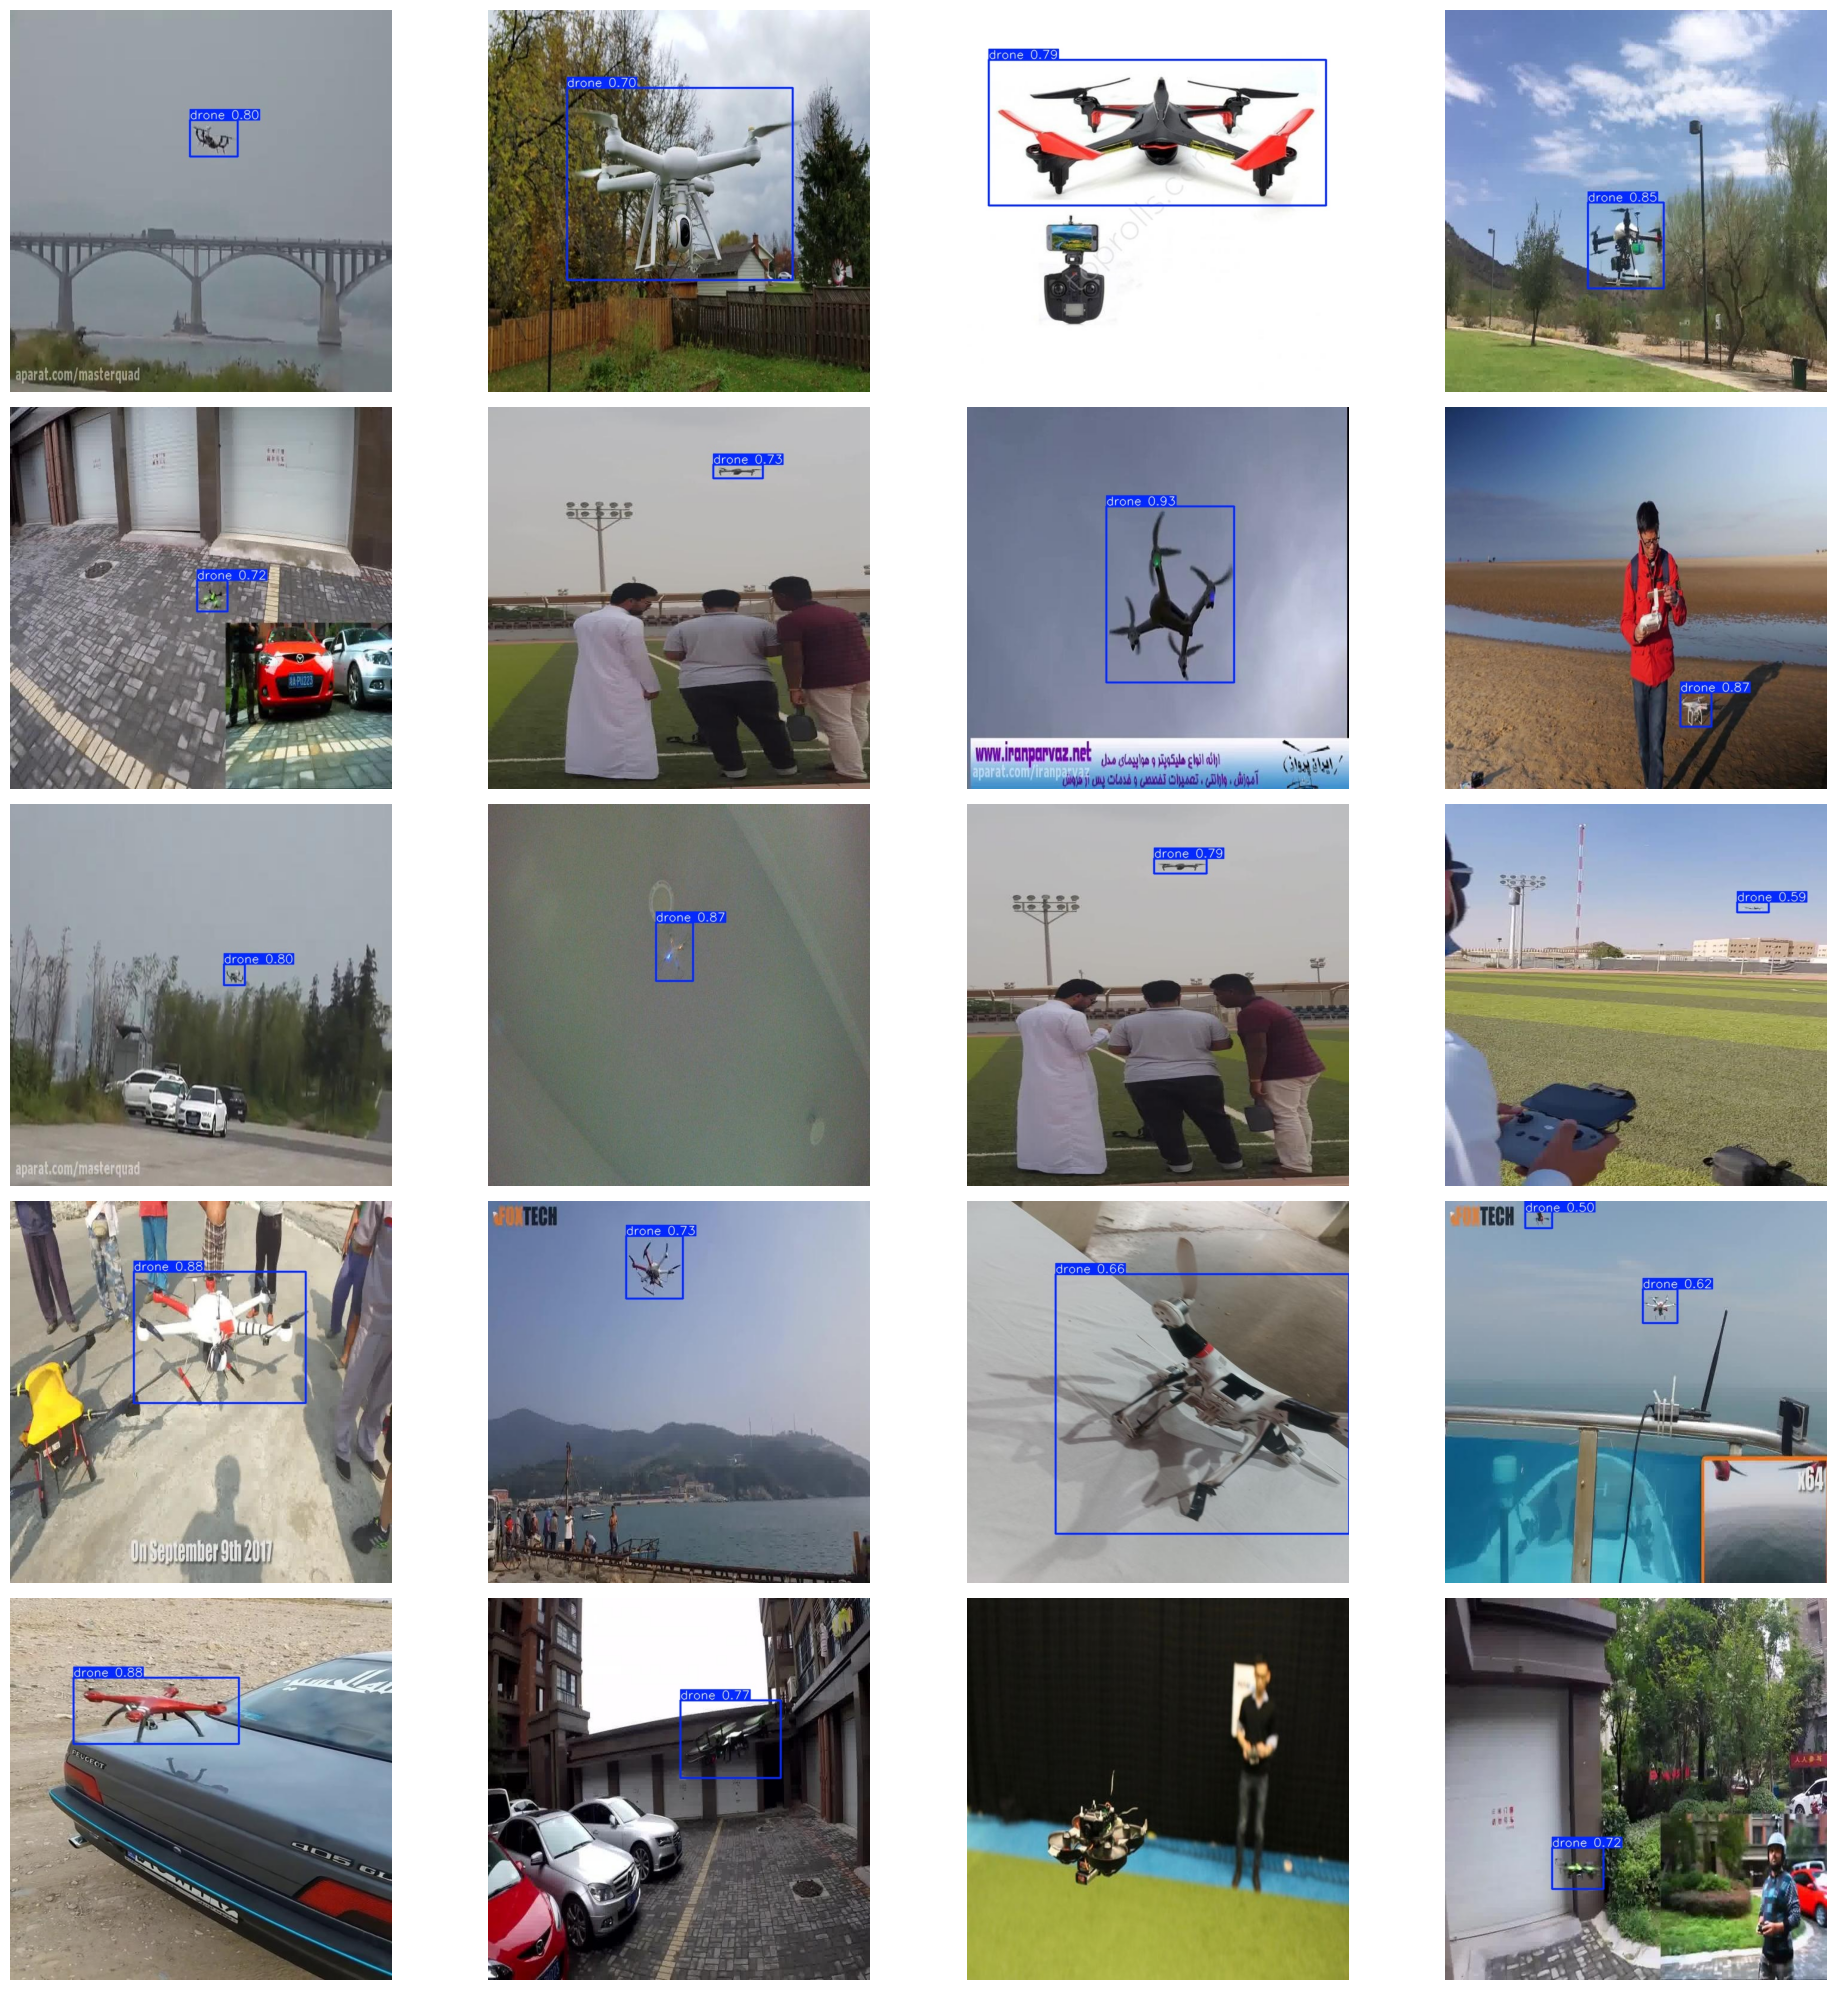

In [ ]:
image_dir = '/kaggle/working/runs/detect/predict5'
image_files = os.listdir(image_dir)
image_files = image_files[:20]

fig, axes = plt.subplots(5, 4, figsize=(20, 20))
axes = axes.flatten()

for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_dir, image_file)

    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')
plt.tight_layout()
plt.show()


# Predicting video data

In [3]:
!yolo detect predict model=/content/best.pt source=/content/test_video.mp4

WARNING ⚠️ /content/best.pt appears to require 'dill', which is not in Ultralytics requirements.
AutoInstall will run now for 'dill' but this feature will be removed in the future.
Recommend fixes are to train a new model using the latest 'ultralytics' package or to run a command with an official Ultralytics model, i.e. 'yolo predict model=yolov8n.pt'
requirements: Ultralytics requirement ['dill'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 45.5 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.9s, installed 1 package: ['dill']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

Ultralytics YOLOv8.2.86 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,125,971 parameters, 0 gradients, 28.4 GFLOPs

video 1/1 (frame 1/568) /content/test_video.mp4: 384x640 1 drone, 39.1ms
video 1/1 (frame 2/568) /content/test_video.mp4: 384x640 1 drone, 10.8ms
video 1/1 (fram

In [2]:
# from IPython.display import Video
# display(Video("/content/runs/detect/predict/test_video.avi", width=480, height=320))


# Zipping and downloading train results

In [ ]:
!zip -r file.zip /kaggle/working/train_results/drone_detection7

  adding: kaggle/working/train_results/drone_detection7/ (stored 0%)
  adding: kaggle/working/train_results/drone_detection7/val_batch1_pred.jpg (deflated 12%)
  adding: kaggle/working/train_results/drone_detection7/F1_curve.png (deflated 17%)
  adding: kaggle/working/train_results/drone_detection7/train_batch8862.jpg (deflated 8%)
  adding: kaggle/working/train_results/drone_detection7/confusion_matrix.png (deflated 36%)
  adding: kaggle/working/train_results/drone_detection7/results.csv (deflated 84%)
  adding: kaggle/working/train_results/drone_detection7/val_batch0_labels.jpg (deflated 7%)
  adding: kaggle/working/train_results/drone_detection7/results.png (deflated 7%)
  adding: kaggle/working/train_results/drone_detection7/val_batch2_pred.jpg (deflated 10%)
  adding: kaggle/working/train_results/drone_detection7/labels.jpg (deflated 37%)
  adding: kaggle/working/train_results/drone_detection7/R_curve.png (deflated 18%)
  adding: kaggle/working/train_results/drone_detection7/P_cur

In [ ]:
from IPython.display import FileLink
FileLink(r'file.zip')

/kaggle/working/file.zip